<h4>O arquivo contém informações sobre estudantes com as seguintes colunas:</h4>
<ul>
    <li><b>StudentID:</b> Identificação do estudante.</li>
    <li><b>Gender:</b> Gênero do estudante.</li>
    <li><b>Age:</b> Idade do estudante.</li>
    <li><b>StudyHoursPerWeek:</b> Horas de estudo por semana.</li>
    <li><b>AttendanceRate:</b> Taxa de frequência às aulas.</li>
    <li><b>GPA:</b> Média ponderada acumulada (nota média).</li>
    <li><b>Major:</b> Curso principal do estudante.</li>
    <li><b>PartTimeJob</b>  Indicação se o estudante tem um trabalho em meio período.</li>
    <li><b></b> Participação em atividades extracurriculares.</li>
    
</ul>

<h1>Análise de Desempenho Estudantil</h1>
    
<h2>Questões para Análise</h2>
    
<h3>1. Correlações Possíveis</h3>
    <ul>
        <li>Existe uma correlação entre o número de horas de estudo por semana e o GPA?</li>
        <li>Como a taxa de frequência às aulas influencia o GPA?</li>
        <li>Estudantes com empregos em meio período apresentam uma média (GPA) diferente daqueles que não trabalham?</li>
    </ul>
    
<h3>2. Distribuições Demográficas</h3>
    <ul>
        <li>Qual é a distribuição de gênero entre os estudantes? Isso afeta o desempenho acadêmico (GPA)?</li>
        <li>Qual é a distribuição etária, e como ela se relaciona com o GPA e outras variáveis?</li>
    </ul>
    
<h3>3. Impacto de Atividades Extracurriculares</h3>
    <ul>
        <li>Estudantes que participam de atividades extracurriculares têm um GPA diferente em comparação com aqueles que não participam?</li>
    </ul>
    
<h3>4. Comparação entre Cursos (Majors)</h3>
    <ul>
        <li>Como os estudantes de diferentes cursos (Majors) se comparam em termos de GPA, horas de estudo, e taxa de frequência?</li>
    </ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('student_performance_data.csv')

In [3]:
df.head()

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  500 non-null    int64  
 1   Gender                     500 non-null    object 
 2   Age                        500 non-null    int64  
 3   StudyHoursPerWeek          500 non-null    int64  
 4   AttendanceRate             500 non-null    float64
 5   GPA                        500 non-null    float64
 6   Major                      500 non-null    object 
 7   PartTimeJob                500 non-null    object 
 8   ExtraCurricularActivities  500 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 35.3+ KB


In [5]:
df.isnull().sum()

StudentID                    0
Gender                       0
Age                          0
StudyHoursPerWeek            0
AttendanceRate               0
GPA                          0
Major                        0
PartTimeJob                  0
ExtraCurricularActivities    0
dtype: int64

<h2>Correlações Possíveis</h2>

<h4>Existe uma correlação entre o número de horas de estudo por semana e o GPA?</h4>

In [8]:
df['StudyHoursPerWeek'].describe()

count    500.000000
mean      19.876000
std       11.471347
min        1.000000
25%       10.000000
50%       20.500000
75%       30.000000
max       39.000000
Name: StudyHoursPerWeek, dtype: float64

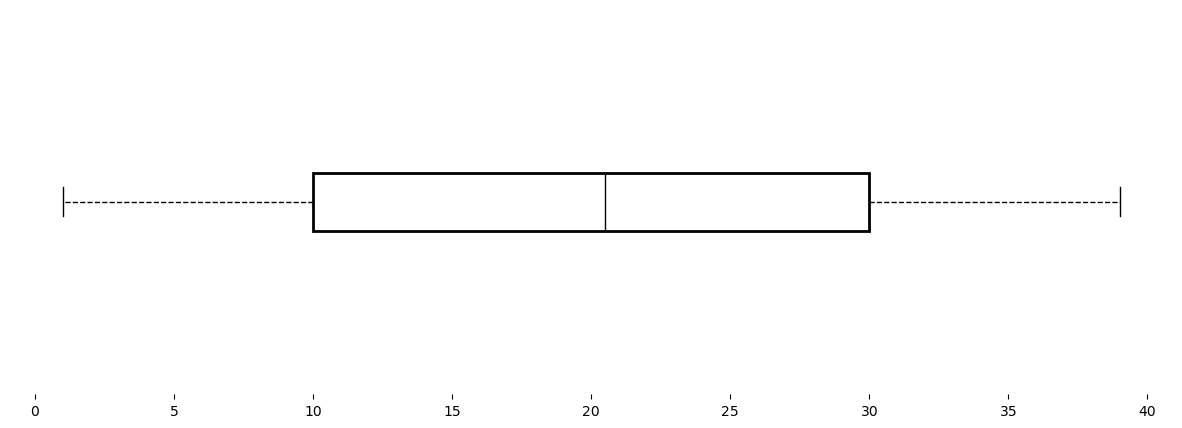

In [601]:
fig, ax = plt.subplots( nrows= 1, ncols= 1, figsize=(15,5))
ax.boxplot(df['StudyHoursPerWeek'], patch_artist=True, boxprops={'color': 'black', 'linewidth': 2, 'facecolor':'white'}, whiskerprops={'linestyle': '--'}, capprops={'color':'black'}, medianprops={'color': 'black'}, vert=False)
plt.yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

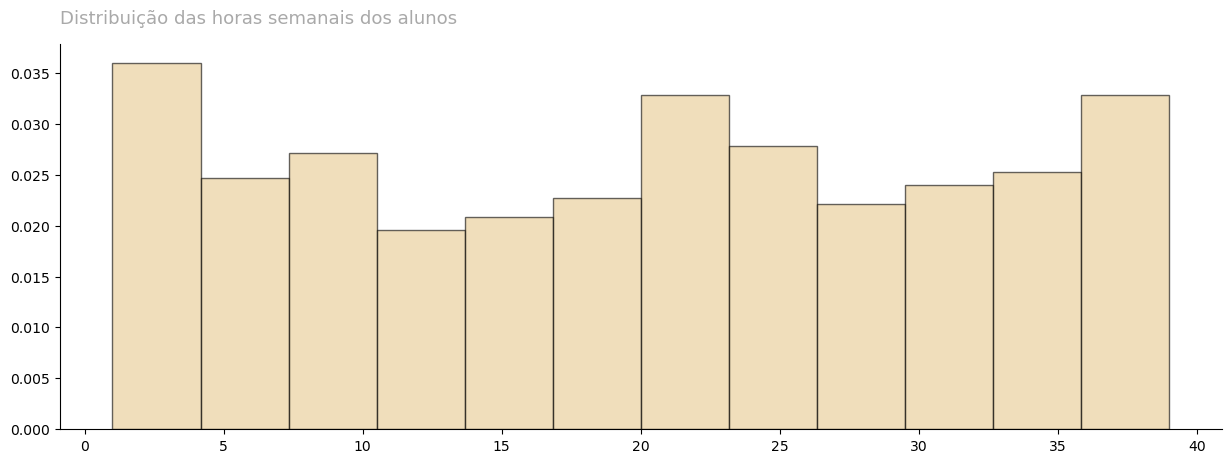

In [603]:
fig, ax = plt.subplots( nrows= 1, ncols= 1,figsize=(15,5))

ax.hist(df['StudyHoursPerWeek'], bins=12, density=True, alpha=0.6, color='#E6C88E', histtype='bar', edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Distribuição das horas semanais dos alunos', fontsize=13, color='darkgray', loc='left', pad=15)

plt.show()

<p>Há um desvio padrão de horas de estudo por semana muito alto, mas não é apresentado nenhum outlier. O que pode causar isso é a falta de alguns alunos nas aulas, ou alguns cursos tem um estudo de horas por semana menor do que os outros.  </p>

In [498]:
alunosComMenos12h = df[df['StudyHoursPerWeek'] < 12.3]['GPA'].mean()
alunosComMenos24h = df[(df['StudyHoursPerWeek'] >= 12.3) & (df['StudyHoursPerWeek'] < 24.6)]['GPA'].mean()
alunosComMais24h = df[df['StudyHoursPerWeek'] >= 24.6]['GPA'].mean()

In [500]:
HorasEmRelacaoGpa = pd.DataFrame({'Horas':['1h - 12h', '12h - 24h', '24h - 37h' ], 'GPA':[alunosComMenos12h, alunosComMenos24h, alunosComMais24h ]})

In [502]:
HorasEmRelacaoGpa

,Horas,GPA
0,1h - 12h,2.946975
1,12h - 24h,2.956454
2,24h - 37h,3.037107


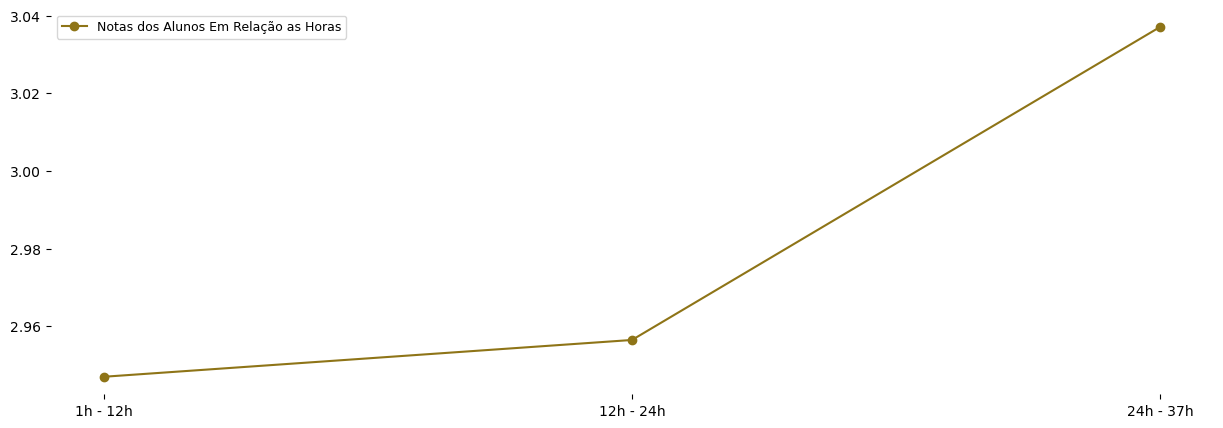

In [589]:
fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize=(15,5))

ax.plot(['1h - 12h', '12h - 24h', '24h - 37h'], HorasEmRelacaoGpa.GPA, color='#8E7417', linestyle='-', marker='o', label='Notas dos Alunos Em Relação as Horas')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.legend(loc='upper left', fontsize=9)
plt.show()


<p></p>

<h4>Como a taxa de frequência às aulas influencia o GPA?</h4>

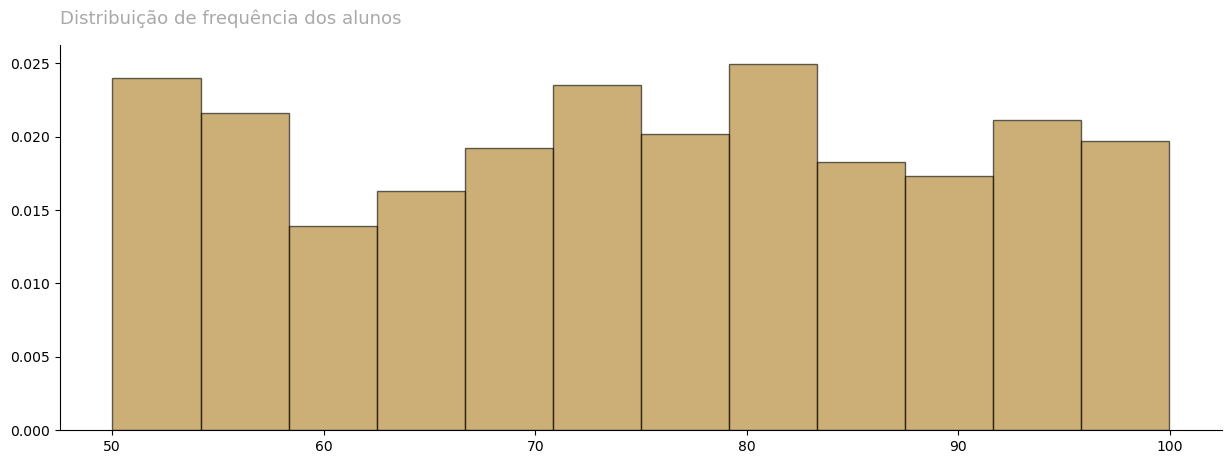

In [591]:
fig, ax = plt.subplots(nrows= 1, ncols= 1,figsize=(15,5))
ax.hist(df['AttendanceRate'], bins=12, density=True, alpha=0.6, color='#AB7B1B', histtype='bar', edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Distribuição de frequência dos alunos', fontsize=13, color='darkgray', loc='left', pad=15)
plt.show()

<p>O gráfico mostra a qauntidade de alunos que faltam em suas aulas, 25% desses alunos tem menos de 62% de frequência.</p>

In [508]:
frequenciaDosAlunos = pd.DataFrame({'Frequência': ['25% e 50%', '50% e 75%', '75% e 100%'], 'GPA': [df[(df['AttendanceRate'] >= 25) & (df['AttendanceRate'] < 50 )]['GPA'].mean(), df[(df['AttendanceRate'] >= 50) & (df['AttendanceRate'] < 75 )]['GPA'].mean(), df[(df['AttendanceRate'] >= 75)]['GPA'].mean()]})

In [510]:
frequenciaDosAlunos

,Frequência,GPA
0,25% e 50%,NaN
1,50% e 75%,2.965182
2,75% e 100%,3.004664


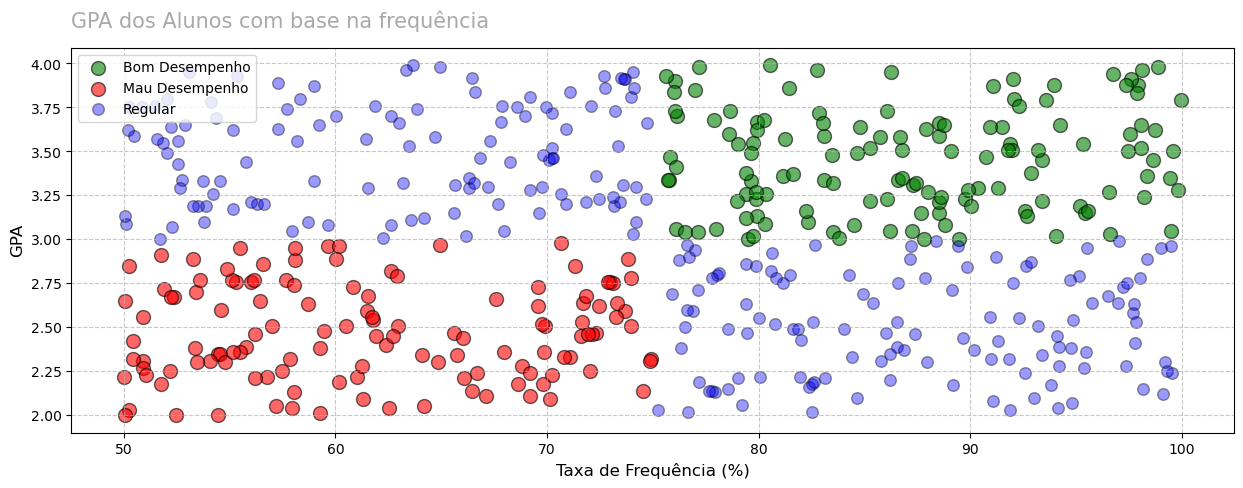

In [567]:
bons_alunos = (df.GPA >= 3) & (df.AttendanceRate >= 75)
ruins_alunos = (df.GPA < 3) & (df.AttendanceRate < 75)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

ax.scatter(df[bons_alunos]['AttendanceRate'], df[bons_alunos]['GPA'], 
           color='green', alpha=0.6, s=100, edgecolor='black', label='Bom Desempenho')

ax.scatter(df[ruins_alunos]['AttendanceRate'], df[ruins_alunos]['GPA'], 
           color='red', alpha=0.6, s=100, edgecolor='black', label='Mau Desempenho')

ax.scatter(df[~bons_alunos & ~ruins_alunos]['AttendanceRate'], df[~bons_alunos & ~ruins_alunos]['GPA'], 
           color='blue', alpha=0.4, s=70, edgecolor='black', label='Regular')

ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title('GPA dos Alunos com base na frequência', fontsize=15, color='darkgray', loc='left', pad=15)
ax.set_xlabel('Taxa de Frequência (%)', fontsize=12)
ax.set_ylabel('GPA', fontsize=12)


ax.legend()

plt.show()


In [516]:
FreqAlta = pd.concat([df[(df['GPA'] > 3) & (df['AttendanceRate'] > 74)], df[(df['GPA'] < 3) & (df['AttendanceRate'] > 74)]])
FreqBaixa = pd.concat([df[(df['GPA'] > 3) & (df['AttendanceRate'] < 74)], df[(df['GPA'] < 3) & (df['AttendanceRate'] < 74)]])
relacaoGpaFreq = pd.DataFrame({'':['Freqência Alta', 'Frequência Baixa'], 'GPA':[FreqAlta['GPA'].mean(), FreqBaixa['GPA'].mean() ]})
relacaoGpaFreq

,,GPA
0,Freqência Alta,3.008000
1,Frequência Baixa,2.959746


<h4>Estudantes com empregos em meio período apresentam uma média (GPA) diferente daqueles que não trabalham?</h4>

In [121]:
AlunosComEmprego = df[df['PartTimeJob'] == 'Yes']

In [125]:
AlunosSemEmprego = df[df['PartTimeJob'] == 'No']

In [395]:
FreqCargaHorariaAlunosEmprego =  pd.DataFrame({'Total de Alunos': [AlunosComEmprego.PartTimeJob.count()/500], 'Média de Frequência %': [AlunosComEmprego.AttendanceRate.mean()], 'Média de Horas':[AlunosComEmprego.StudyHoursPerWeek.mean()], 'GPA': [AlunosComEmprego['GPA'].mean()] })
FreqCargaHorariaAlunosNoEmprego =  pd.DataFrame({'Total de Alunos': [AlunosSemEmprego.PartTimeJob.count()/500], 'Média de Frequência %': [AlunosSemEmprego.AttendanceRate.mean()], 'Média de Horas':[AlunosSemEmprego.StudyHoursPerWeek.mean()], 'GPA':[AlunosSemEmprego['GPA'].mean()]})
comparitivo_alunos = pd.concat([FreqCargaHorariaAlunosEmprego,FreqCargaHorariaAlunosNoEmprego],ignore_index=True)
comparitivo_alunos.rename(index= {0:'Alunos com Emprego',1:'Alunos sem Emprego'}, inplace=True)
comparitivo_alunos

,Total de Alunos,Média de Frequência %,Média de Horas,GPA
Alunos com Emprego,0.536,74.635187,19.761194,3.006343
Alunos sem Emprego,0.464,75.400690,20.008621,2.960690


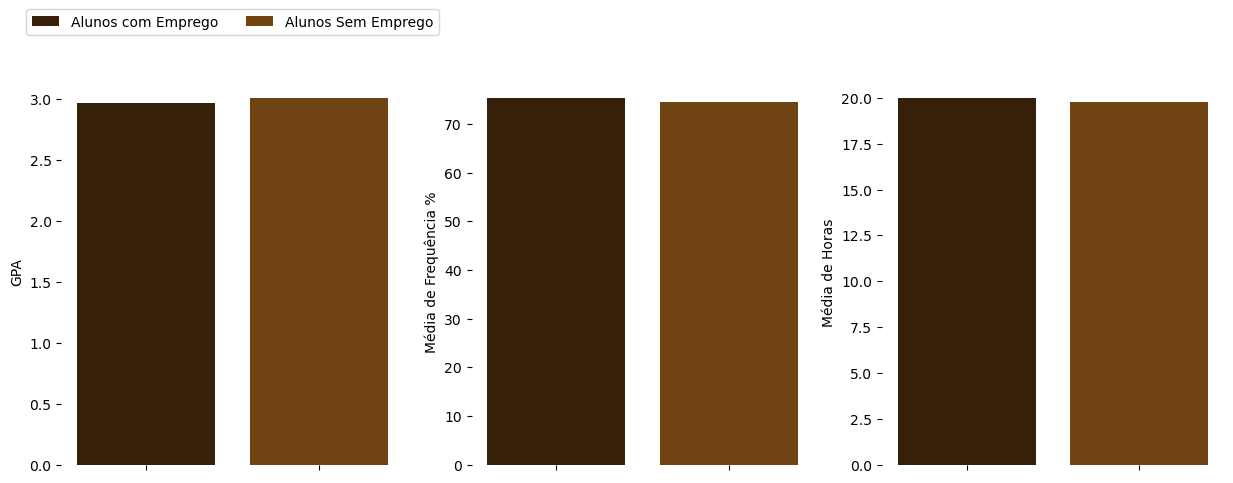

In [629]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
cols = ['GPA','Média de Frequência %','Média de Horas']

for axes in range(len(ax)):
    ax[axes].bar(['Alunos com Emprego','Alunos Sem Emprego'],[comparitivo_alunos[cols[axes]].iloc[1],comparitivo_alunos[cols[axes]].iloc[0]], label=['Alunos com Emprego','Alunos Sem Emprego'], color=['#362009','#704313'])
    for spine in ax[axes].spines.values():
        spine.set_visible(False)
    ax[axes].set_ylabel(cols[axes])
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)

for ax in ax.flat:
    ax.set_xticklabels([])

plt.show()

<p>E o que se vê é que os alunos com emprego meio período não está em desvantagem em relação aos outros alunos (Horas de Estudo semanal e Frequência). E assim, Olhando para o GPA, os alunos com emprego meio período obtever uma pequena vantagem, talvez esses alunos conseguem trazer a experiência do trabalho para as atividade acadêmicas, e facilitando nas notas(GPA), agora olhando para a freqência os alunos sem emprego levam uma minímma vantagem, mas nada exagerado.  </p>

<h2>Distribuições Demográficas</h2>

<h4>Qual é a distribuição de gênero entre os estudantes? Isso afeta o desempenho acadêmico (GPA)?</h4>

In [453]:
df_distrinuicaodemografica = pd.DataFrame({'Sexo':['Female', 'Male'], 'Distrinuição %':[df['Gender'].value_counts(normalize=True).iloc[0],df['Gender'].value_counts(normalize=True).iloc[1]], 'Taxa de Frequência': [df[df['Gender'] == 'Female' ]['AttendanceRate'].mean(),df[df['Gender'] == 'Male' ]['AttendanceRate'].mean()], 'GPA': [df[df['Gender'] == 'Female' ]['GPA'].mean(), df[df['Gender'] == 'Male' ]['GPA'].mean() ] })
df_distrinuicaodemografica

,Sexo,Distrinuição %,Taxa de Frequência,GPA
0,Female,0.512,75.925742,2.995352
1,Male,0.488,74.009016,2.974467


<p>O público feminio representa mais da metadade da instituição com 51,2% dos estudantes, e os homens 48,8%, mesmo com uma diferença bem pequena as mulhres mostrou ter um desempenho(GPA) melhor, enquanto os homens apresenta uma taxa de frequência um pouco melhor.</p>

<h4>Qual é a distribuição etária, e como ela se relaciona com o GPA e outras variáveis?</h4>

In [302]:
dfPorIdadeAlunos = pd.DataFrame({'Faixa etária':['18-20','20-22','22-24'], 'Total %':[df[(df['Age'] >=18) & (df['Age'] < 20)]['Age'].count()/500, df[(df['Age'] >=20) & (df['Age'] < 22)]['Age'].count()/500, df[(df['Age'] >=22)]['Age'].count()/500], 'GPA':[df[(df['Age'] >=18) & (df['Age'] < 20)]['GPA'].mean(), df[(df['Age'] >=20) & (df['Age'] < 22)]['GPA'].mean(), df[(df['Age'] >=22)]['GPA'].mean()], 'Frequência %': [df[(df['Age'] >=18) & (df['Age'] < 20)]['AttendanceRate'].mean(), df[(df['Age'] >=20) & (df['Age'] < 22)]['AttendanceRate'].mean(), df[(df['Age'] >=22) ]['AttendanceRate'].mean()], 'Horas De Estudo Na Semana':[df[(df['Age'] >=18) & (df['Age'] < 20)]['StudyHoursPerWeek'].mean(), df[(df['Age'] >=20) & (df['Age'] < 22)]['StudyHoursPerWeek'].mean(), df[(df['Age'] >=22)]['StudyHoursPerWeek'].mean()], 'Trabalham Meio Período %': [df[(df['Age'] >=18) & (df['Age'] < 20) & (df['PartTimeJob'] == 'Yes') ]['PartTimeJob'].count()/210, df[(df['Age'] >=20) & (df['Age'] < 22)  & (df['PartTimeJob'] == 'Yes')]['PartTimeJob'].count()/218, df[(df['Age'] >=22) & (df['PartTimeJob'] == 'Yes')]['PartTimeJob'].count()/217], 'Não Trabalham Meio Período  %': [df[(df['Age'] >=18) & (df['Age'] < 20) & (df['PartTimeJob'] == 'No') ]['PartTimeJob'].count()/210, df[(df['Age'] >=20) & (df['Age'] < 22)  & (df['PartTimeJob'] == 'No')]['PartTimeJob'].count()/218, df[(df['Age'] >=22)  & (df['PartTimeJob'] == 'No')]['PartTimeJob'].count()/217], 'Fazem Curso Extracrurricular%': [df[(df['Age'] >=18) & (df['Age'] < 20) & (df['ExtraCurricularActivities'] == 'Yes') ]['ExtraCurricularActivities'].count()/210, df[(df['Age'] >=20) & (df['Age'] < 22)  & (df['ExtraCurricularActivities'] == 'Yes')]['ExtraCurricularActivities'].count()/218, df[(df['Age'] >=22) & (df['Age'] <= 24)  & (df['ExtraCurricularActivities'] == 'Yes')]['ExtraCurricularActivities'].count()/217], 'Não Fazem Curso Extracurricular %': [df[(df['Age'] >=18) & (df['Age'] < 20) & (df['ExtraCurricularActivities'] == 'No') ]['PartTimeJob'].count()/210, df[(df['Age'] >=20) & (df['Age'] < 22)  & (df['ExtraCurricularActivities'] == 'No')]['ExtraCurricularActivities'].count()/218, df[(df['Age'] >=22)  & (df['ExtraCurricularActivities'] == 'No')]['ExtraCurricularActivities'].count()/217] })

In [299]:
dfPorIdadeAlunos

,Faixa etária,Total %,GPA,Frequência %,Horas De Estudo Na Semana,Trabalham Meio Período %,Não Trabalham Meio Período %,Fazem Curso Extracrurricular%,Não Fazem Curso Extracurricular %
0,18-20,0.306,2.943399,74.688039,20.261438,0.409524,0.319048,0.352381,0.376190
1,20-22,0.260,2.963308,73.934769,19.330769,0.334862,0.261468,0.270642,0.325688
2,22-24,0.434,3.027696,75.835945,19.930876,0.502304,0.497696,0.493088,0.506912


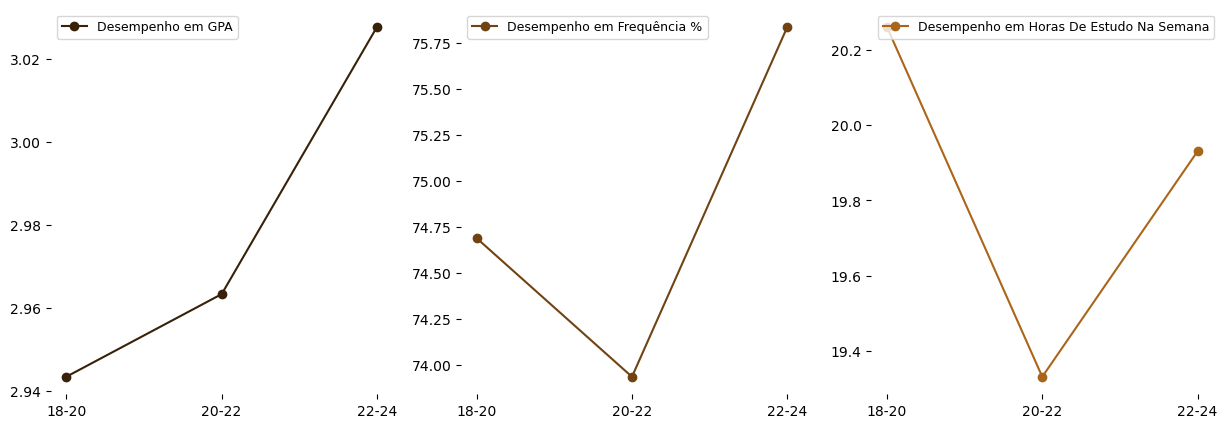

In [583]:
fig, ax = plt.subplots(nrows= 1, ncols= 3, figsize=(15,5))
cols = ['GPA','Frequência %','Horas De Estudo Na Semana']
colors = ['#382109','#714312','#AA651B']
for axes in range(len(ax)):
    ax[axes].plot(['18-20','20-22','22-24'], dfPorIdadeAlunos[cols[axes]], color=colors[axes], linestyle='-', marker='o', label=f'Desempenho em {cols[axes]}')
    ax[axes].legend(loc='upper left', fontsize=9)

    for spine in ax[axes].spines.values():
        spine.set_visible(False)


plt.show()

<h2>Impacto de Atividades Extracurriculares</h2>

<h4>Estudantes que participam de atividades extracurriculares têm um GPA diferente em comparação com aqueles que não participam?</h4>

In [556]:
AlunosCursoExtra = df[df['ExtraCurricularActivities'] == 'Yes']

In [72]:
AlunosSemCurosExtra =  df[df['ExtraCurricularActivities'] == 'No']

In [496]:
desemepenhoDosAlunos = pd.DataFrame({'Tipos de Alunos':['Com Curso Extra', 'Sem Curso Extra'], 'Total de Alunos %':[AlunosCursoExtra.ExtraCurricularActivities.count()/500, AlunosSemCurosExtra.ExtraCurricularActivities.count()/500 ], 'Média de Frequência %': [AlunosCursoExtra.AttendanceRate.mean(), AlunosSemCurosExtra.AttendanceRate.mean()], 'Média de Horas':[AlunosCursoExtra.StudyHoursPerWeek.mean(),AlunosSemCurosExtra.StudyHoursPerWeek.mean()], 'GPA':[AlunosCursoExtra.GPA.mean(), AlunosSemCurosExtra.GPA.mean() ] })
desemepenhoDosAlunos

,Tipos de Alunos,Total de Alunos %,Média de Frequência %,Média de Horas,GPA
0,Com Curso Extra,0.48,75.345833,19.916667,3.008083
1,Sem Curso Extra,0.52,74.662269,19.838462,2.964000


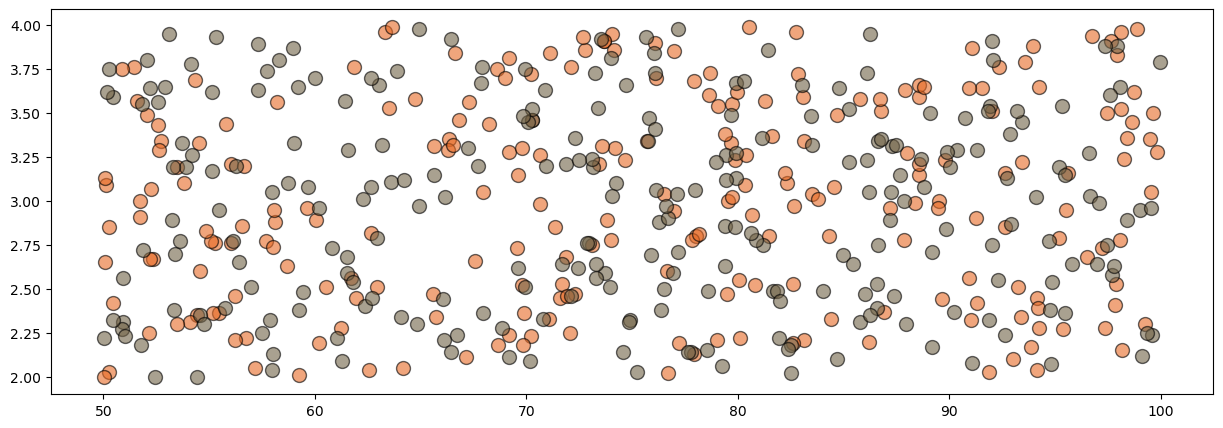

In [631]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

ax.scatter(AlunosCursoExtra.AttendanceRate,AlunosCursoExtra.GPA,color='#E66925', alpha=0.6, s=100, edgecolor='black')
ax.scatter(AlunosSemCurosExtra.AttendanceRate,AlunosSemCurosExtra.GPA,color='#716246', alpha=0.6, s=100, edgecolor='black')
plt.show()

<p>O mesmo acontece aqui, os alunos com curso extra levam uma miníma vantagem no GPA. E diferente do alunos com emprego, os alunos que fazem curso extra tem uma pequena vantagem na freqência comparado com os alunos que não fazem curso extra, mesmo com 26,2% trabalhando e fazendo cursoExtraCurricular. </p>

<h2>Comparação entre Cursos (Majors)</h2>

<h4>Como os estudantes de diferentes cursos (Majors) se comparam em termos de GPA, horas de estudo, e taxa de frequência?</h4>

In [83]:
df['Major'].value_counts()

Major
Business       114
Engineering    109
Arts           100
Education       97
Science         80
Name: count, dtype: int64

In [85]:
DesempenhoMajor = pd.DataFrame({ 'Cursos': ['Arts', 'Education', 'Business', 'Science', 'Engineering'], 'Número de Alunos %': [df['Major'].isin(['Arts']).value_counts(normalize=True).iloc[1], df['Major'].isin(['Education']).value_counts(normalize=True).iloc[1], df['Major'].isin(['Business']).value_counts(normalize=True).iloc[1], df['Major'].isin(['Science']).value_counts(normalize=True).iloc[1], df['Major'].isin(['Engineering']).value_counts(normalize=True).iloc[1]],  'GPA': [df[df['Major'].isin(['Arts'])]['GPA'].sum(), df[df['Major'].isin(['Education'])]['GPA'].sum(), df[df['Major'].isin(['Business'])]['GPA'].sum(), df[df['Major'].isin(['Science'])]['GPA'].sum(), df[df['Major'].isin(['Engineering'])]['GPA'].sum()], 'Frequência': [df[df['Major'].isin(['Arts'])]['AttendanceRate'].mean(), df[df['Major'].isin(['Education'])]['AttendanceRate'].mean(), df[df['Major'].isin(['Business'])]['AttendanceRate'].mean(), df[df['Major'].isin(['Science'])]['AttendanceRate'].mean(), df[df['Major'].isin(['Engineering'])]['AttendanceRate'].mean()], 'Horas De Estudo Na Semana': [df[df['Major'].isin(['Arts'])]['StudyHoursPerWeek'].sum(), df[df['Major'].isin(['Education'])]['StudyHoursPerWeek'].sum(), df[df['Major'].isin(['Business'])]['StudyHoursPerWeek'].sum(), df[df['Major'].isin(['Science'])]['StudyHoursPerWeek'].sum(), df[df['Major'].isin(['Engineering'])]['StudyHoursPerWeek'].sum()]})

In [87]:
DesempenhoMajor

,Cursos,Número de Alunos %,GPA,Frequência,Horas De Estudo Na Semana
0,Arts,0.200,300.71,74.317700,1951
1,Education,0.194,285.07,75.985155,2030
2,Business,0.228,346.10,75.296228,2359
3,Science,0.160,236.66,72.944875,1473
4,Engineering,0.218,324.04,75.903670,2125


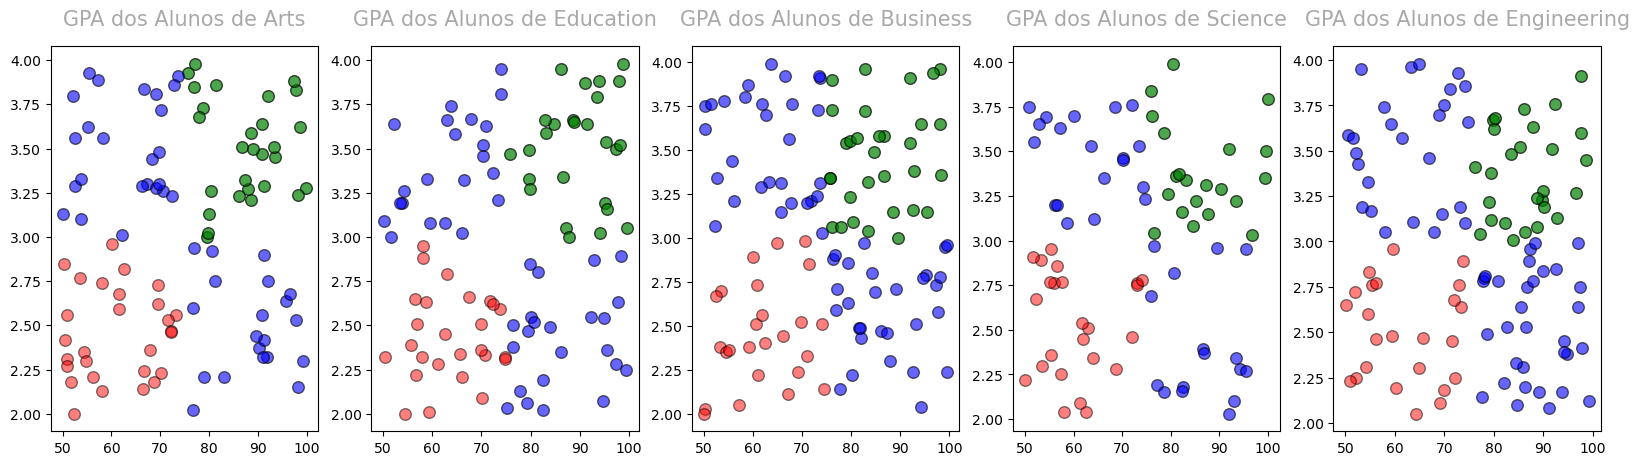

In [451]:
fig, ax = plt.subplots(nrows= 1, ncols= 5, figsize=(20,5))
materias = [df[df['Major'].isin(['Arts'])],
 df[df['Major'].isin(['Education'])],
 df[df['Major'].isin(['Business'])],
 df[df['Major'].isin(['Science'])],
 df[df['Major'].isin(['Engineering'])]]

plot = 0
for materia in range(len(materias)):
    ruinsalunos = (materias[materia].AttendanceRate < 75) & (materias[materia].GPA < 3)
    bonsalunos = (materias[materia].AttendanceRate >= 75) & (materias[materia].GPA >= 3)

    for i in range(plot, plot + 1):
        ax[i].scatter(materias[materia][bonsalunos]['AttendanceRate'],materias[materia][bonsalunos]['GPA'], color='g', alpha=0.7, s=70, edgecolor='black')
        ax[i].scatter(materias[materia][ruinsalunos]['AttendanceRate'],materias[materia][ruinsalunos]['GPA'], color='r', alpha=0.5, s=70, edgecolor='black')
        ax[i].scatter(materias[materia][~bonsalunos & ~ruinsalunos]['AttendanceRate'], materias[materia][~bonsalunos & ~ruinsalunos]['GPA'],color='b', alpha=0.6, s=70, edgecolor= 'black')
        ax[i].set_title(f'GPA dos Alunos de {DesempenhoMajor.Cursos.iloc[plot]}', fontsize=15, color='darkgray', loc='center', pad=15)
    plot += 1


plt.show()

<p>O curso Busines é oucupado por 22,4% dos alunos, e logo atrás é Engineering com 21,8% dos alunos, por serem os curso que tem mais oucupantes, eles apresntam um desempenho melhor(GPA), em comparação aos outros. O curso que se destacou menos foi Science, que tem apenas 16% dos alunos. Em resumo os resulatdos não fugiram muito do esperado, os curos com mais estudantes aprenstou um desempenho melhor.  </p>